In [1]:
# to avoid to restart kernel when external modules are modified
%load_ext autoreload
%autoreload 2

In [2]:
from utils import load_streaming_history_data, map_int_day_to_weekday_name

In [3]:
DEFAULT_LOCAL_TIMEZONE = "America/Mexico_City"

In [4]:
data = load_streaming_history_data()
data.head()

,endTime,artistName,trackName,msPlayed
0,2021-12-04 02:27,Dash Berlin,Waiting - Extended Mix,31691
1,2021-12-07 05:58,MGMT,Little Dark Age,299960
2,2021-12-07 06:01,BlabberMouf,On Da Rise,187425
3,2021-12-07 06:06,Tricky,Hell Is Round The Corner,226960
4,2021-12-07 06:08,The xx,Intro,127920


In [5]:
data.shape

(9900, 4)

In [6]:
data.sample(10)

,endTime,artistName,trackName,msPlayed
9751,2022-12-03 17:53,Dexys Midnight Runners,"The Celtic Soul Brothers (More, Please, Thank ...",27650
5463,2022-08-15 01:06,La Garfield,When the Sun Goes Down,234793
7944,2022-10-12 01:50,Adrián Roberto,Dame,253546
3331,2022-06-04 17:18,Los Enanitos Verdes,Luz De Dia,268866
2965,2022-05-28 20:56,La Arrolladora Banda El Limón De Rene Camacho,Ya Te Perdí La Fe,146240
174,2021-12-13 02:21,Ronan Keating,When You Say Nothing At All - Spanglish Version,290666
74,2021-12-09 20:21,Taylor Swift,Mean,237746
3949,2022-06-25 16:25,Rey Pila,No Longer Fun,205346
2929,2022-05-26 18:35,Manuel Medrano,Afuera Del Planeta,229405
5062,2022-08-02 04:46,Duelo,Veneno - Version Mariachi,174171


In [19]:
from wrapy import (
    compute_unique_values,
    count_song_skips,
    create_bar_graph,
    create_polar_graph,
    create_simple_plot,
    calculate_human_total_play,
    generate_plays_to_x_map,
)

In [9]:
count_song_skips(data)

{'percentage': 6.686868686868687, 'total': 662}

In [10]:
calculate_human_total_play(data)

{'days': 23, 'hours': 5, 'minutes': 3}

In [11]:
compute_unique_values(data, "artistName")
compute_unique_values(data, "trackName")

artistName: 2110
trackName: 3447


3447

In [12]:
plays_per_weekday = generate_plays_to_x_map(data, DEFAULT_LOCAL_TIMEZONE, x_target="weekday")
plays_per_weekday

[(0, 1440), (1, 1142), (2, 1045), (3, 1134), (4, 817), (5, 2103), (6, 2219)]

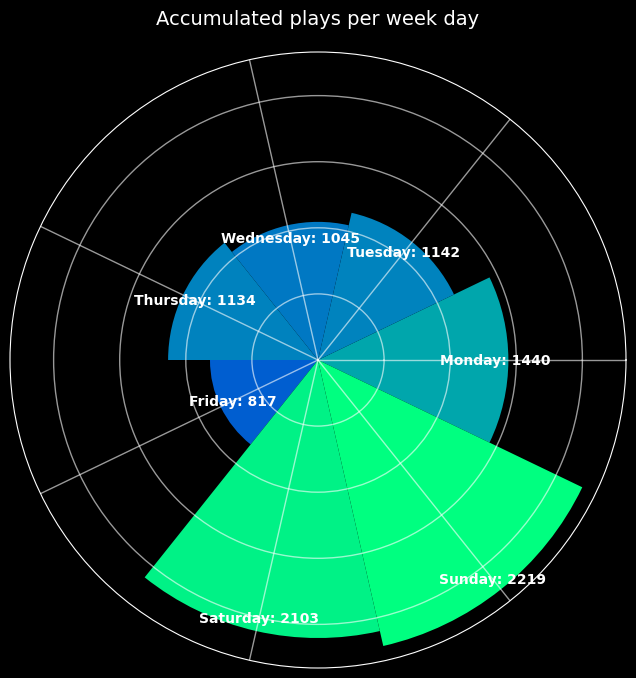

In [20]:
create_polar_graph(
    data=plays_per_weekday,
    plot_title="Accumulated plays per week day",
    label_map_fn=map_int_day_to_weekday_name
)

In [14]:
plays_per_hour = generate_plays_to_x_map(
    data=data, local_timezone=DEFAULT_LOCAL_TIMEZONE, x_target="hour"
)
plays_per_hour

[(0, 1099),
 (1, 273),
 (2, 26),
 (3, 3),
 (4, 6),
 (8, 44),
 (9, 139),
 (10, 241),
 (11, 398),
 (12, 416),
 (13, 458),
 (14, 503),
 (15, 348),
 (16, 272),
 (17, 296),
 (18, 212),
 (19, 400),
 (20, 898),
 (21, 1001),
 (22, 1346),
 (23, 1521)]

In [21]:
from utils import separate_di_tuples_in_two_lists

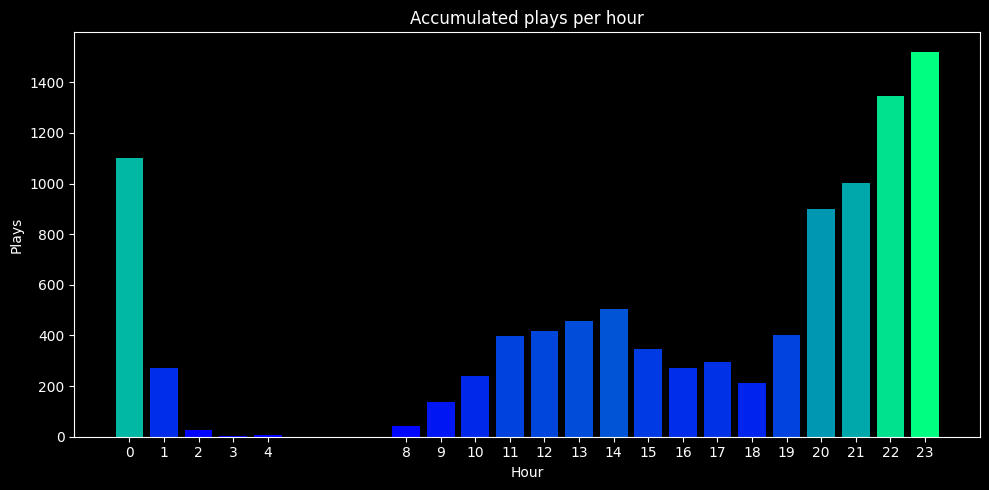

In [22]:
x, y = separate_di_tuples_in_two_lists(plays_per_hour)

create_bar_graph(
    x=x, y=y, plot_title="Accumulated plays per hour", x_label="Hour"
)

In [16]:
plays_per_month = generate_plays_to_x_map(
    data, local_timezone=DEFAULT_LOCAL_TIMEZONE, x_target="month"
)

plays_per_month

[(1, 467),
 (2, 542),
 (3, 395),
 (4, 360),
 (5, 779),
 (6, 925),
 (7, 936),
 (8, 1114),
 (9, 1355),
 (10, 1304),
 (11, 847),
 (12, 876)]

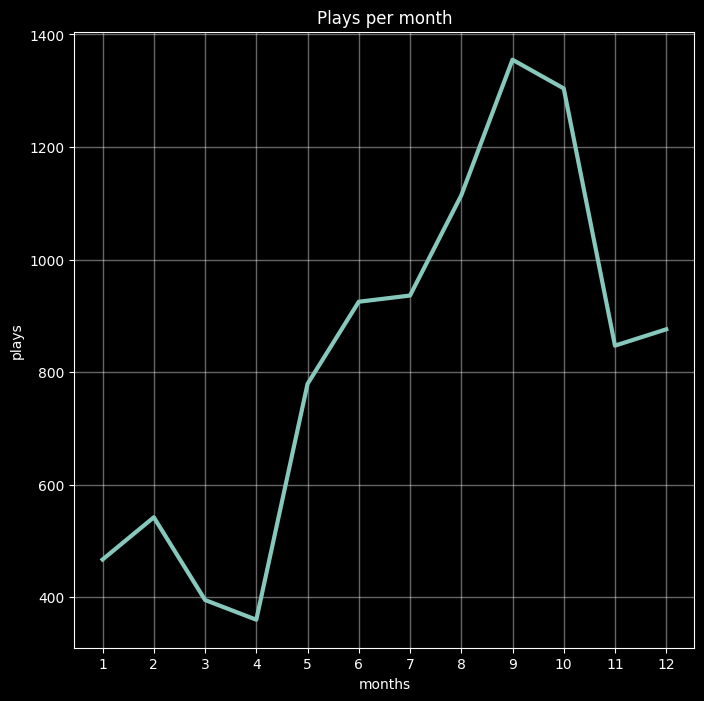

In [17]:
x = list()
y = list()

for month_id, plays in plays_per_month:
    x.append(month_id)
    y.append(plays)

create_simple_plot(x, y, plot_title="Plays per month", x_label="months")